In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
x,y=make_classification(n_samples=100,   #total number of data points
    n_features=2,         #total number of features
    n_informative=1,      #number of features that are actually useful 
    n_redundant=0,       #number of redundant features(no new information)
    n_classes=2,      #number of classes or labels
    n_clusters_per_class=1,    # number of clusters within each class
    class_sep=10,   # separation between the clusters(distance)
    hypercube=False,
    random_state=41)
# hypercube=True: Data points ek box jaisi boundary mein honge.

# hypercube=False: Data points scattered, natural looking.

In [3]:
x

array([[ 0.19924745, -0.11697552],
       [-0.24882029, -0.73115232],
       [-0.3544904 , -0.7081059 ],
       [-1.59086506, -2.01199214],
       [-0.20083951,  1.63493163],
       [-0.83241122,  0.15599044],
       [-1.79207014,  1.07782053],
       [ 0.0856607 ,  0.80626713],
       [-0.55865299,  0.74859527],
       [-1.95974262,  0.75152794],
       [-1.77828947, -0.90114581],
       [-1.77985853, -0.1815243 ],
       [-0.02194151, -2.98092432],
       [ 0.80563431,  1.20500136],
       [-1.82701214,  0.78302407],
       [ 0.38730728,  0.42968688],
       [-0.14108668, -0.73229726],
       [-1.87955941, -0.83930476],
       [-0.18232911,  0.83727062],
       [-1.77059533, -0.10255323],
       [-2.27658028,  0.65867001],
       [-2.06519502,  0.92649819],
       [-1.31690551,  0.10216193],
       [ 1.61043259,  0.46886454],
       [-1.21650394,  0.45432938],
       [ 0.6139723 ,  1.8613386 ],
       [-1.78760957, -0.79255991],
       [-1.04149161, -1.0004391 ],
       [-2.40067584,

In [4]:
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])

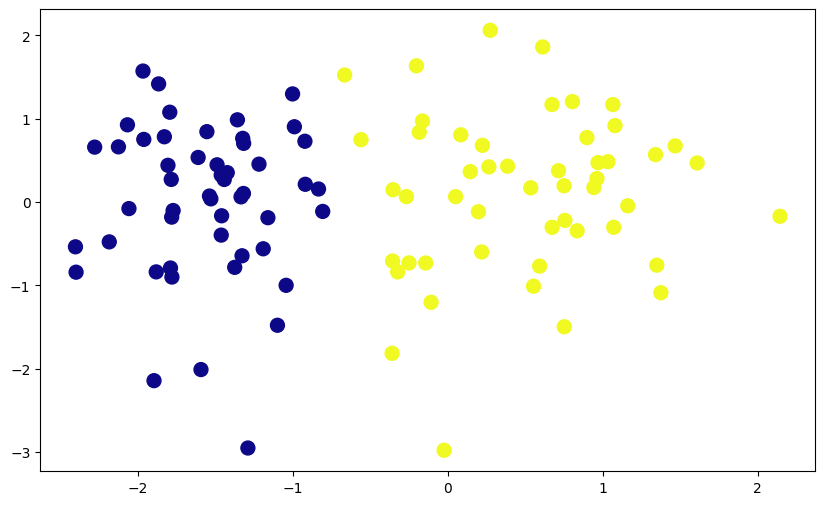

In [5]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1] , cmap='plasma', c=y,s=100)

In [6]:
def perceptron(x,y):
    # np.insert(array, position, value, axis)
    x=np.insert(x,0,1, axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_pred=step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_pred)*x[j]
    
    return weights[0], weights[1:]
    

In [7]:
def step(z):
    return 1 if z>0 else 0

In [8]:
intercept_ , coef_=perceptron(x,y)

In [9]:
intercept_ , coef_

(1.0, array([1.34599085, 0.13056798]))

In [10]:
# y=mx+b
# m=-x1/x2
# b=-b(intercept)/x2


In [11]:
m=-(coef_[0]/coef_[1])
b=-(intercept_/coef_[1])

In [12]:
x_input = np.linspace(-3,3,100)
y_input = m *x_input+b



(-3.0, 2.0)

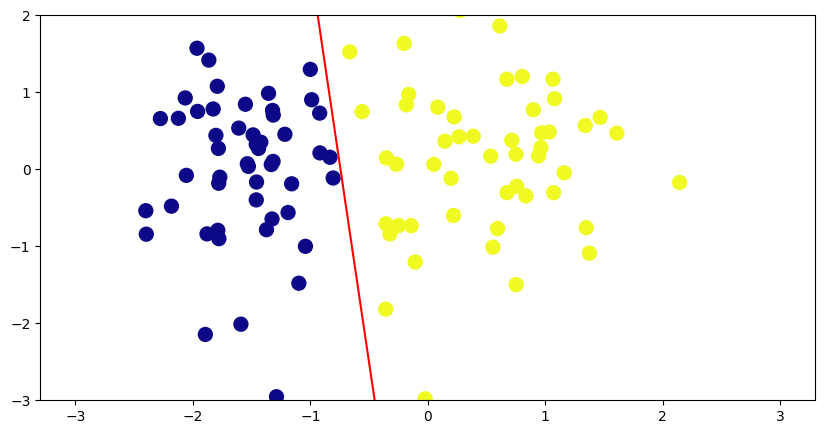

In [13]:
plt.figure(figsize=(10,5))
plt.plot(x_input , y_input , c='red' )
plt.scatter(x[:,0], x[:,1], c=y, cmap='plasma', s=100)
plt.ylim(-3,2)

In [14]:
def perceptron(x,y):
    m=[]
    b=[]
    # np.insert(array, position, value, axis)
    x=np.insert(x,0,1, axis=1)
    weights=np.ones(x.shape[1])
    lr=0.1

    for i in range(1000):
        j=np.random.randint(0,100)
        y_pred=step(np.dot(x[j],weights))
        weights=weights+lr*(y[j]-y_pred)*x[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))    
    return m, b
    

In [15]:
m,b= perceptron(x,y)

In [23]:
%matplotlib inline

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

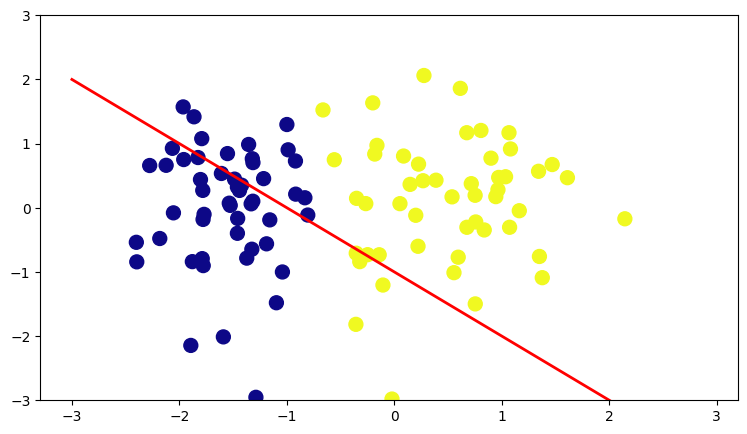

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(9, 5))

# X range for plotting
x_i = np.arange(-3, 3, 0.1)

# Example dataset (assume X and y already defined)
# X is 2D array, y is labels
ax.scatter(x[:, 0], x[:, 1], c=y, cmap='plasma', s=100)

# Initial line
line, = ax.plot(x_i, x_i * m[0] + b[0], 'r-', linewidth=2)

# ax.set_ylim(-3, 3)
plt.ylim(-3, 3)

# Update function for animation
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i * m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

# Animate
anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
plt.show()


In [25]:
import sys
print(sys.executable)

C:\Users\smc\AppData\Local\Programs\Python\Python312\python.exe
